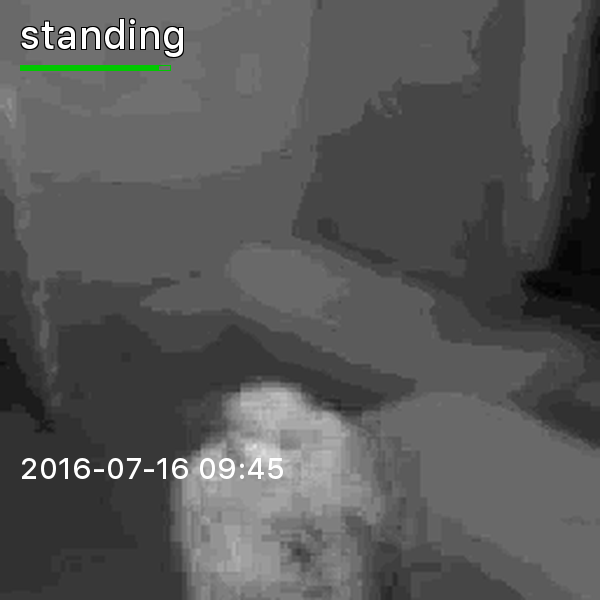

In [4]:
from PIL import Image

url="/media/Gui2/thermix/thermix_38a_sarmiento_003/14_tim/3/Users_golden5s_unkown_2016-07-16_12%3A45%3A58.000000_1/0_0.png"

img = Image.open(url)
img
